In [1]:
import json
import sys

sys.path.append('../data')
sys.path.append('..')

import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from src.datasets.newsimages import NewsImageDataset

In [2]:
CSV_PATH = '../data/newsimages_25_v1.0/newsarticles.csv'
IMAGE_PATH = '../data/newsimages_25_v1.0/newsimages/'

In [3]:
news_image_dataset = NewsImageDataset(IMAGE_PATH, CSV_PATH)

In [ ]:
sample = news_image_dataset[75]
tags_to_add = []
for i,tags in enumerate(sample['tags']):
    separable_tag = None
    if '|' in tags:
        separable_tag = sample['tags'].pop(i)
        separable_tag = separable_tag.split("|")
    if separable_tag:
        tags_to_add.extend(separable_tag)
if tags_to_add:
    sample['tags'].extend(tags_to_add)

here


Two things to match:

1. Recognized entities in the title
2. Matched entities within the tags
3. Partial entity match
4. Embedding match?

In [4]:
tagged_dataset = {}

In [37]:

for i in range(len(news_image_dataset)):
    sample = news_image_dataset[i]
    tags_to_add = []
    for tags in sample['tags']:
        for i,tags in enumerate(sample['tags']):
            separable_tag = None
            if '|' in tags:
                separable_tag = sample['tags'].pop(i)
                separable_tag = separable_tag.split("|")
            if separable_tag:
                tags_to_add.extend(separable_tag)
    if tags_to_add:
        news_image_dataset[i]['tags'].extend(tags_to_add)


 

In [6]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")


c:\Users\P70088666\Video-Learning\video-learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 333/333 [00:00<00:00, 84.2kB/s]
c:\Users\P70088666\Video-Learning\video-learning\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\P70088666\.cache\huggingface\hub\models--Babelscape--wikineural-multilingual-ner. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks

In [7]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

c:\Users\P70088666\Video-Learning\video-learning\lib\site-packages\transformers\pipelines\token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [45]:
dataset_ners = []
for i in range(len(news_image_dataset)):
    ner_results = nlp(news_image_dataset[i]['title'])
    dataset_ners.append(ner_results)

In [15]:
news_image_dataset[25]['title']

"UAE President Mohamed bin Zayed receives Turkey's President Recep Tayyip Erdogan, speaks of close and historic ties between the two nations"

In [17]:
dataset_ners[25]

[{'entity_group': 'LOC',
  'score': 0.93606883,
  'word': 'UAE',
  'start': 0,
  'end': 3},
 {'entity_group': 'PER',
  'score': 0.99970454,
  'word': 'Mohamed bin Zayed',
  'start': 14,
  'end': 31},
 {'entity_group': 'LOC',
  'score': 0.9939856,
  'word': 'Turkey',
  'start': 41,
  'end': 47},
 {'entity_group': 'PER',
  'score': 0.99368876,
  'word': 'Tayyip Erdogan',
  'start': 66,
  'end': 80}]

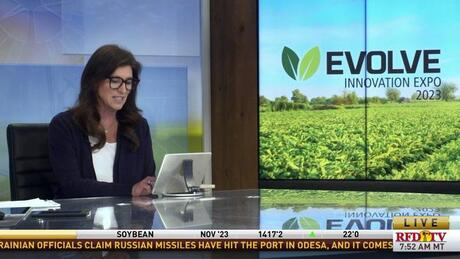

In [19]:
news_image_dataset[i]['image']

In [47]:
tagged_dataset = {}

In [58]:
for i in range(len(news_image_dataset)):
    tags_to_match = news_image_dataset[i]['tags']
    tagged_dataset[i] = {'Article Title':news_image_dataset[i]['title'],'Whole match':[],'Partial match': [],'No match': []}
    # Whole match 
   
    for entity_dict in dataset_ners[i]:
        print(entity_dict)
        print(entity_dict['word'])
        No_flag = True
        if entity_dict['word'].lower() in tags_to_match:
            tagged_dataset[i]['Whole match'].append(entity_dict['word'])
            tags_to_match.pop(tags_to_match.index(entity_dict['word'].lower()))
            print(tags_to_match)
            No_flag =False
        else:
            for tag in tags_to_match:
                if entity_dict['word'].lower() in tag.lower():
                    tagged_dataset[i]['Partial match'].append(entity_dict['word'])
                    tags_to_match.pop(tags_to_match.index(tag))
                    No_flag =False

        if No_flag:
            tagged_dataset[i]['No match'].append(entity_dict['word'])
    print(tagged_dataset)
    if i ==25:
        break
                    

                

{'entity_group': 'ORG', 'score': 0.9673468, 'word': 'Helena Agri - Enterprises', 'start': 0, 'end': 23}
Helena Agri - Enterprises
{'entity_group': 'MISC', 'score': 0.92458075, 'word': 'Evolve Innovations Expo', 'start': 30, 'end': 53}
Evolve Innovations Expo
{'entity_group': 'LOC', 'score': 0.99929404, 'word': 'Memphis', 'start': 57, 'end': 64}
Memphis
{0: {'Article Title': 'Helena Agri-Enterprises hosts Evolve Innovations Expo in Memphis', 'Whole match': [], 'Partial match': [], 'No match': ['Helena Agri - Enterprises', 'Evolve Innovations Expo', 'Memphis']}, 1: {'Whole match': [], 'Partial match': [], 'No match': ['No Evidence Of Toddler On Highway Before Carlee Russell Vanished : Cops']}, 2: {'Whole match': [], 'Partial match': [], 'No match': ['Laramie Rangers', 'Final Home Games']}, 3: {'Whole match': [], 'Partial match': [], 'No match': ['Alberta']}, 4: {'Whole match': [], 'Partial match': [], 'No match': ['England', "Women ' s World Cup"]}, 5: {'Whole match': [], 'Partial match'

In [ ]:
print(tagged_dataset)

{0: {'Whole match': [], 'Partial match': [], 'No match': ['Helena Agri - Enterprises', 'Evolve Innovations Expo', 'Memphis']}, 1: {'Whole match': [], 'Partial match': [], 'No match': ['No Evidence Of Toddler On Highway Before Carlee Russell Vanished : Cops']}, 2: {'Whole match': [], 'Partial match': [], 'No match': ['Laramie Rangers', 'Final Home Games']}, 3: {'Whole match': [], 'Partial match': [], 'No match': ['Alberta']}, 4: {'Whole match': [], 'Partial match': [], 'No match': ['England', "Women ' s World Cup"]}, 5: {'Whole match': [], 'Partial match': ['Chinese'], 'No match': ['U. S.']}, 6: {'Whole match': ['National Park Service'], 'Partial match': [], 'No match': ['Warning After Second Woman Attacked By Bison']}, 7: {'Whole match': [], 'Partial match': [], 'No match': ['Hero', 'Dog', 'Locating Escaped In', 'Michael Burham']}, 8: {'Whole match': [], 'Partial match': [], 'No match': ['UK']}, 9: {'Whole match': [], 'Partial match': [], 'No match': ['Maricopa County', 'Arizona', 'Loc

In [55]:
import pprint

In [61]:
news_image_dataset[0]['tags']

['products group', 'agricenter international']

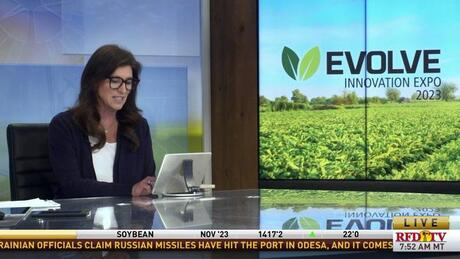

In [60]:
news_image_dataset[0]['image']

In [59]:
pprint.pp(tagged_dataset)

{0: {'Article Title': 'Helena Agri-Enterprises hosts Evolve Innovations Expo '
                      'in Memphis',
     'Whole match': [],
     'Partial match': [],
     'No match': ['Helena Agri - Enterprises',
                  'Evolve Innovations Expo',
                  'Memphis']},
 1: {'Article Title': 'No Evidence Of Toddler On Highway Before Carlee Russell '
                      'Vanished: Cops',
     'Whole match': [],
     'Partial match': [],
     'No match': ['No Evidence Of Toddler On Highway Before Carlee Russell '
                  'Vanished : Cops']},
 2: {'Article Title': 'Laramie Rangers Play Final Home Games of 2023',
     'Whole match': [],
     'Partial match': [],
     'No match': ['Laramie Rangers', 'Final Home Games']},
 3: {'Article Title': "'Undesired' air brake release behind B.C. train "
                      'derailment near Alberta: report',
     'Whole match': [],
     'Partial match': [],
     'No match': ['Alberta']},
 4: {'Article Title': "Why England